In [1]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
 
from numpy.random import seed
seed(888)

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



tf.random.set_seed(404)

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix
    
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils


import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline

Using TensorFlow backend.


In [2]:
df=pd.read_csv('downsampled.csv')

df.drop('Unnamed: 0',inplace=True,axis=1)

df_copy=df.copy()
Y=np.array(df_copy['stimulus'])

df_copy.drop(labels='stimulus',axis=1,inplace=True)
X=np.array(df_copy)


In [3]:

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


In [4]:
y=dummy_y

In [5]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
X=scaler.fit_transform(X)


In [6]:
X=abs(X)

In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, shuffle= True)


X_train=abs(X_train)
X_test=abs(X_test)
X_train.min()


0.0

In [60]:
def create_network():

    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', input_dim = 68))
    classifier.add(Dropout(rate = 0.1))

    # Adding the second hidden layer
    classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))

    # Adding the second hidden layer
    classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))

    # Adding the output layer
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [61]:
classifier= create_network()
history= classifier.fit(X_train,y_train,epochs=52,batch_size=70)
score,acc= classifier.evaluate(X_test,y_test, verbose=2)



Train on 27389 samples
Epoch 1/52
27389/27389 [==============================] - 5s 187us/sample - loss: 1.1248 - accuracy: 0.5230
Epoch 2/52
27389/27389 [==============================] - 4s 157us/sample - loss: 0.8581 - accuracy: 0.6464
Epoch 3/52
27389/27389 [==============================] - 3s 92us/sample - loss: 0.7380 - accuracy: 0.7040
Epoch 4/52
27389/27389 [==============================] - 2s 62us/sample - loss: 0.6728 - accuracy: 0.7311
Epoch 5/52
27389/27389 [==============================] - 2s 64us/sample - loss: 0.6109 - accuracy: 0.7599
Epoch 6/52
27389/27389 [==============================] - 2s 71us/sample - loss: 0.5823 - accuracy: 0.7700
Epoch 7/52
27389/27389 [==============================] - 2s 78us/sample - loss: 0.5460 - accuracy: 0.7838
Epoch 8/52
27389/27389 [==============================] - 2s 81us/sample - loss: 0.5255 - accuracy: 0.7933
Epoch 9/52
27389/27389 [==============================] - 2s 81us/sample - loss: 0.4982 - accuracy: 0.8043
Epoch 10/52


In [27]:
aa=classifier.predict(X_test)

In [30]:
arr=pd.DataFrame(y_test)

In [53]:
kf = KFold( n_splits=10, shuffle=True, random_state=888)

neural_network = KerasClassifier(build_fn=create_network,epochs=52, batch_size=70)

results=cross_val_score(neural_network, X_train, y_train, cv=kf)




Train on 24650 samples
Epoch 1/52
24650/24650 [==============================] - 2s 64us/sample - loss: 1.0246 - accuracy: 0.5813
Epoch 2/52
24650/24650 [==============================] - 1s 37us/sample - loss: 0.7292 - accuracy: 0.7085
Epoch 3/52
24650/24650 [==============================] - 1s 37us/sample - loss: 0.6411 - accuracy: 0.7453
Epoch 4/52
24650/24650 [==============================] - 1s 38us/sample - loss: 0.5908 - accuracy: 0.7660
Epoch 5/52
24650/24650 [==============================] - 1s 38us/sample - loss: 0.5554 - accuracy: 0.7789
Epoch 6/52
24650/24650 [==============================] - 4s 169us/sample - loss: 0.5145 - accuracy: 0.7946
Epoch 7/52
24650/24650 [==============================] - 2s 80us/sample - loss: 0.4970 - accuracy: 0.8017
Epoch 8/52
24650/24650 [==============================] - 2s 76us/sample - loss: 0.4648 - accuracy: 0.8153
Epoch 9/52
24650/24650 [==============================] - 2s 78us/sample - loss: 0.4528 - accuracy: 0.8202
Epoch 10/52
2

24650/24650 [==============================] - 2s 81us/sample - loss: 0.2678 - accuracy: 0.8985
Epoch 24/52
24650/24650 [==============================] - 2s 81us/sample - loss: 0.2509 - accuracy: 0.9047
Epoch 25/52
24650/24650 [==============================] - 3s 109us/sample - loss: 0.2492 - accuracy: 0.9055
Epoch 26/52
24650/24650 [==============================] - 3s 119us/sample - loss: 0.2312 - accuracy: 0.9099
Epoch 27/52
24650/24650 [==============================] - 3s 118us/sample - loss: 0.2248 - accuracy: 0.9117
Epoch 28/52
24650/24650 [==============================] - 3s 104us/sample - loss: 0.2161 - accuracy: 0.9176
Epoch 29/52
24650/24650 [==============================] - 2s 81us/sample - loss: 0.2157 - accuracy: 0.9191
Epoch 30/52
24650/24650 [==============================] - 2s 78us/sample - loss: 0.2027 - accuracy: 0.9239
Epoch 31/52
24650/24650 [==============================] - 2s 82us/sample - loss: 0.1886 - accuracy: 0.9292
Epoch 32/52
24650/24650 [===========

24650/24650 [==============================] - 2s 95us/sample - loss: 0.1320 - accuracy: 0.9513
Epoch 46/52
24650/24650 [==============================] - 2s 95us/sample - loss: 0.1211 - accuracy: 0.9566
Epoch 47/52
24650/24650 [==============================] - 2s 98us/sample - loss: 0.1151 - accuracy: 0.9575
Epoch 48/52
24650/24650 [==============================] - 2s 94us/sample - loss: 0.1129 - accuracy: 0.9591
Epoch 49/52
24650/24650 [==============================] - 2s 94us/sample - loss: 0.1166 - accuracy: 0.9587
Epoch 50/52
24650/24650 [==============================] - 2s 95us/sample - loss: 0.1002 - accuracy: 0.9639
Epoch 51/52
24650/24650 [==============================] - 2s 95us/sample - loss: 0.1034 - accuracy: 0.9625
Epoch 52/52
2739/2739 [==============================] - 0s 128us/sample - loss: 0.0948 - accuracy: 0.9679
Train on 24650 samples
Epoch 1/52
24650/24650 [==============================] - 4s 174us/sample - loss: 1.0139 - accuracy: 0.5822
Epoch 2/52
24650/2

Epoch 15/52
24650/24650 [==============================] - 2s 71us/sample - loss: 0.3582 - accuracy: 0.8609
Epoch 16/52
24650/24650 [==============================] - 2s 73us/sample - loss: 0.3339 - accuracy: 0.8699
Epoch 17/52
24650/24650 [==============================] - 2s 71us/sample - loss: 0.3221 - accuracy: 0.8763
Epoch 18/52
24650/24650 [==============================] - 2s 73us/sample - loss: 0.3110 - accuracy: 0.8798
Epoch 19/52
24650/24650 [==============================] - 2s 67us/sample - loss: 0.2983 - accuracy: 0.8860
Epoch 20/52
24650/24650 [==============================] - 2s 73us/sample - loss: 0.2818 - accuracy: 0.8915
Epoch 21/52
24650/24650 [==============================] - 2s 75us/sample - loss: 0.2812 - accuracy: 0.8918
Epoch 22/52
24650/24650 [==============================] - 2s 73us/sample - loss: 0.2654 - accuracy: 0.8977
Epoch 23/52
24650/24650 [==============================] - 2s 72us/sample - loss: 0.2622 - accuracy: 0.9018
Epoch 24/52
24650/24650 [===

24650/24650 [==============================] - 2s 76us/sample - loss: 0.1659 - accuracy: 0.9370
Epoch 38/52
24650/24650 [==============================] - 2s 76us/sample - loss: 0.1448 - accuracy: 0.9465
Epoch 39/52
24650/24650 [==============================] - 2s 73us/sample - loss: 0.1497 - accuracy: 0.9439
Epoch 40/52
24650/24650 [==============================] - 2s 77us/sample - loss: 0.1610 - accuracy: 0.9398
Epoch 41/52
24650/24650 [==============================] - 2s 75us/sample - loss: 0.1368 - accuracy: 0.9502
Epoch 42/52
24650/24650 [==============================] - 2s 75us/sample - loss: 0.1487 - accuracy: 0.9434
Epoch 43/52
24650/24650 [==============================] - 2s 67us/sample - loss: 0.1259 - accuracy: 0.9532
Epoch 44/52
24650/24650 [==============================] - 2s 77us/sample - loss: 0.1234 - accuracy: 0.9554
Epoch 45/52
24650/24650 [==============================] - 2s 76us/sample - loss: 0.1251 - accuracy: 0.9531
Epoch 46/52
24650/24650 [===============

24650/24650 [==============================] - 3s 102us/sample - loss: 0.5282 - accuracy: 0.7915
Epoch 7/52
24650/24650 [==============================] - 3s 102us/sample - loss: 0.4928 - accuracy: 0.8045
Epoch 8/52
24650/24650 [==============================] - 2s 92us/sample - loss: 0.4775 - accuracy: 0.8104
Epoch 9/52
24650/24650 [==============================] - 3s 102us/sample - loss: 0.4499 - accuracy: 0.8210
Epoch 10/52
24650/24650 [==============================] - 3s 103us/sample - loss: 0.4341 - accuracy: 0.8303
Epoch 11/52
24650/24650 [==============================] - 3s 102us/sample - loss: 0.4039 - accuracy: 0.8429
Epoch 12/52
24650/24650 [==============================] - 3s 102us/sample - loss: 0.4035 - accuracy: 0.8437
Epoch 13/52
24650/24650 [==============================] - 3s 102us/sample - loss: 0.3700 - accuracy: 0.8548
Epoch 14/52
24650/24650 [==============================] - 3s 102us/sample - loss: 0.3587 - accuracy: 0.8594
Epoch 15/52
24650/24650 [==========

24650/24650 [==============================] - 3s 129us/sample - loss: 0.2080 - accuracy: 0.9215
Epoch 29/52
24650/24650 [==============================] - 3s 103us/sample - loss: 0.2124 - accuracy: 0.9198
Epoch 30/52
24650/24650 [==============================] - 4s 157us/sample - loss: 0.2004 - accuracy: 0.9244
Epoch 31/52
24650/24650 [==============================] - 4s 159us/sample - loss: 0.1923 - accuracy: 0.9279
Epoch 32/52
24650/24650 [==============================] - 4s 155us/sample - loss: 0.1847 - accuracy: 0.9297
Epoch 33/52
24650/24650 [==============================] - 4s 152us/sample - loss: 0.1791 - accuracy: 0.9327
Epoch 34/52
24650/24650 [==============================] - 4s 159us/sample - loss: 0.1701 - accuracy: 0.9378
Epoch 35/52
24650/24650 [==============================] - 4s 154us/sample - loss: 0.1593 - accuracy: 0.9411
Epoch 36/52
24650/24650 [==============================] - 4s 156us/sample - loss: 0.1545 - accuracy: 0.9426
Epoch 37/52
24650/24650 [======

24651/24651 [==============================] - 3s 111us/sample - loss: 0.1035 - accuracy: 0.9622
Epoch 51/52
24651/24651 [==============================] - 4s 142us/sample - loss: 0.1063 - accuracy: 0.9608
Epoch 52/52
2738/2738 [==============================] - 0s 119us/sample - loss: 0.0703 - accuracy: 0.9770


In [55]:
results.mean()


0.9648038387298584

In [59]:
results

array([0.96093464, 0.95545822, 0.96787149, 0.96677619, 0.97626871,
       0.96677619, 0.97152245, 0.95326763, 0.95217234, 0.97699052])

dict_keys(['loss', 'accuracy'])


KeyError: 'val_accuracy'

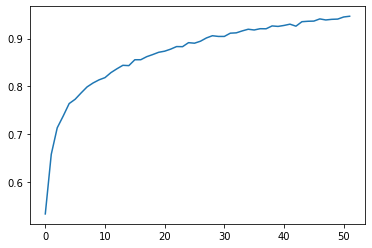

In [20]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
import pickle
# save the model to disk
filename = 'ANN.sav'
pickle.dump(history, open(filename, 'wb'))
#filename2 = 'ANN2.sav'
#pickle.dump(classifier, open(filename, 'wb')) 

In [18]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
neural_network.save('my_model')




AttributeError: 'KerasClassifier' object has no attribute 'save'

In [ ]:
classifier.save('ANN.h5')


In [ ]:
classifier